# Cardiovascular Disease Analysis
## Project Overview
The primary goal of this project is to analyze cardiovascular disease (CVD) risk factors using a dataset that includes various medical and lifestyle factors. CVD remains one of the leading causes of death worldwide, and understanding its risk factors can help develop prevention strategies. This analysis aims to identify correlations and trends in the data that could provide insight into how different factors contribute to the development of cardiovascular disease.
## Dataset
### cardio_data.csv[Dataset Link](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

Cardiovascular Disease Dataset:
The dataset used in this analysis contains medical and lifestyle information for a large number of individuals. The dataset includes the following columns:

id: Unique identifier for each individual.
age: Age in days.
gender: Gender of the individual (1 = female, 2 = male).
height: Height of the individual in centimeters.
weight: Weight of the individual in kilograms.
ap_hi: Systolic blood pressure.
ap_lo: Diastolic blood pressure.
cholesterol: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal).
gluc: Glucose level (1 = normal, 2 = above normal, 3 = well above normal).
smoke: Whether the individual smokes (1 = yes, 0 = no).
alco: Whether the individual consumes alcohol (1 = yes, 0 = no).
active: Whether the individual is physically active (1 = active, 0 = inactive).
cardio: Whether the individual has cardiovascular disease (1 = yes, 0 = no).

### health_data.json

Family History: Information about family history of CVD.
Diet Score: A score representing the individual's adherence to a healthy diet.
Exercise Hours: Number of hours the individual engages in physical activity per week.
Stress Level: Stress level of the individual (e.g., low, moderate, high).



Theoretical Purpose:
This  can help healthcare professionals understand which risk factors are most strongly associated with cardiovascular disease. By identifying high-risk groups, healthcare providers can focus on preventive care, such as lifestyle interventions, dietary recommendations, and targeted treatments. In addition, the analysis can aid in public health initiatives to reduce the prevalence of cardiovascular disease.


## Importing Required Libraries

In this step,import the necessary libraries for data manipulation, visualization, and preprocessing.

- **pandas**: For data manipulation and analysis.
- **seaborn**: For advanced statistical data visualization.
- **matplotlib**: For creating static, animated, and interactive plots.
- **sklearn.preprocessing**: For label encoding to handle categorical data.

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Loading the Data

In this step,load the cardiovascular disease dataset and the additional health data.

1. **Cardio Dataset (CSV)**: The main dataset contains information about individuals, including health metrics such as age, gender, cholesterol levels, blood pressure, etc. This data is loaded from a CSV file.
2. **Health Dataset (JSON)**: The health-related data contains additional details about the individuals such as family history, diet score, exercise hours, and stress level. This data is loaded from a JSON file.

I use the `pandas` `read_csv` method to load the CSV file and the `read_json` method to load the JSON file. We also check the shape of the cardio dataset to verify the dimensions after loading.


In [52]:
# Loading the CSV file
csv_file_path = '/content/drive/My Drive/cardio_data.csv'  # Replace with actual CSV file path
cardio_df = pd.read_csv(csv_file_path,delimiter=';')

# Loading the JSON file
json_file_path = '/content/drive/My Drive/health_data.json'  # Replace with actual JSON file path
health_df = pd.read_json(json_file_path)
cardio_df.shape

(70000, 13)

## Inspecting the DataFrame

After loading the data, I inspect the structure of the `cardio_df` DataFrame using the `info()` method. This method provides the following details:
- The number of entries (rows)
- The column names
- The data types of each column
- The number of non-null values in each column

This helps us understand the data better, including any potential missing values or type mismatches.


In [53]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Statistical Summary of the Data

I use the `describe()` function to obtain a statistical summary of the numerical features in the `cardio_df` DataFrame. This summary includes:

- **Count**: The number of non-null entries.
- **Mean**: The average value of each column.
- **Standard Deviation**: A measure of how much each column's values vary from the mean.
- **Min and Max**: The minimum and maximum values in each column.
- **25%, 50%, and 75%**: The quartiles (25th, 50th, and 75th percentiles) which provide an idea of the data's distribution.

This summary helps us understand the central tendency, spread, and range of the dataset's features.

```python
# Statistical summary of the DataFrame
cardio_df.describe()


In [54]:
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Checking for Missing Values

I use the `isnull().sum()` function to check for missing (null) values in the `cardio_df` DataFrame. This function returns the count of missing values for each column. Identifying missing data is a crucial step in data preprocessing to ensure that our analysis is accurate and complete.


In [55]:
cardio_df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


## Checking for Missing Values - Results

After applying the `isnull().sum()` function to the `cardio_df` DataFrame, I observed that there are no missing values in any of the columns. This indicates that the dataset is complete, and we can proceed with our analysis without needing to handle missing data.

## Merging
### Merging Cardio Data with Health Data

In this step, I perform an inner join between the cardiovascular dataset (`cardio_df`) and the health dataset (`health_df`) using the `id` column. This operation combines the two datasets, keeping only the rows where the `id` exists in both datasets. The shape of the resulting merged dataset is then displayed.



In [56]:
merged_data_1 = pd.merge(cardio_df, health_df, on='id', how="inner")
merged_data_1.shape

(6994, 17)

### Creating Logical Regions and Facilities Based on ID Ranges

In this step, I created logical regions and facilities based on the `id` values in the merged dataset (`merged_data_1`). I define a function that assigns a region and facility to each record using the `id` value. The regions and facilities are assigned in a repeating pattern based on the remainder when dividing the `id` by 4. This is achieved using the following rules:

- If the `id % 4 == 0`, assign "North" and "Hospital A"
- If the `id % 4 == 1`, assign "South" and "Hospital B"
- If the `id % 4 == 2`, assign "East" and "Clinic X"
- If the `id % 4 == 3`, assign "West" and "Clinic Y"

After applying this mapping, a new `region_data` DataFrame is created and merged with the original `merged_data_1` DataFrame to form `patient_with_regions`. This new dataset now includes the regions and facilities along with the existing cardiovascular and health data.



In [57]:

# Creating logical regions and facilities based on ID ranges
def assign_region_and_facility(id_value):
    if id_value % 4 == 0:
        return "North", "Hospital A"
    elif id_value % 4 == 1:
        return "South", "Hospital B"
    elif id_value % 4 == 2:
        return "East", "Clinic X"
    else:
        return "West", "Clinic Y"

# Applying logical mapping
region_data = pd.DataFrame({
    "id": merged_data_1["id"],
    "region": merged_data_1["id"].apply(lambda x: assign_region_and_facility(x)[0]),
    "facility": merged_data_1["id"].apply(lambda x: assign_region_and_facility(x)[1]),
})

# Performing the second join
patient_with_regions = pd.merge(merged_data_1, region_data, on="id", how="inner")

# Displaying the shape and preview of the second merged DataFrame
print("Shape of the second merged DataFrame:", patient_with_regions.shape)
print("Preview of the second merged DataFrame:")
print(patient_with_regions.shape)


Shape of the second merged DataFrame: (7998, 19)
Preview of the second merged DataFrame:
(7998, 19)


### Data Transformations

In this step, several new columns are created in the dataset, which provide valuable insights into the patients' health status. These transformations include calculations for Body Mass Index (BMI), blood pressure categories, age groups, health risk score, and activity status.

1. **BMI Calculation**:  
   The Body Mass Index (BMI) is calculated using the formula:  
   \[
   \text{BMI} = \frac{\text{weight}}{\text{height}^2} \times 10000
   \]
   This gives a measure of body fat based on weight and height.

2. **Blood Pressure Classification**:  
   Blood pressure is classified into four categories based on the systolic (`ap_hi`) and diastolic (`ap_lo`) values:
   - **Normal**: Systolic < 120 and Diastolic < 80
   - **Elevated**: Systolic between 120-139 or Diastolic between 80-89
   - **High**: Systolic between 140-179 or Diastolic between 90-119
   - **Hypertensive Crisis**: Systolic ≥ 180 or Diastolic ≥ 120

3. **Age Group Classification**:  
   The patients' ages are grouped into four categories:
   - 18-30 years
   - 31-50 years
   - 51-70 years
   - 70+ years  
   Age is calculated by converting the age in days to years.

4. **Health Risk Score**:  
   A simple scoring system based on cholesterol, glucose levels, and smoking status is used to assess the health risk of a patient:
   - Cholesterol: 1 point for level 2, 2 points for level 3.
   - Glucose: 1 point for level 2, 2 points for level 3.
   - Smoking: 3 points for smoking.

5. **Activity Status**:  
   The `active` column is transformed into an activity status where:
   - `1` becomes "Active"
   - `0` becomes "Inactive"


In [58]:
# BMI Calculation
patient_with_regions['bmi'] = patient_with_regions['weight'] / (patient_with_regions['height'] ** 2) * 10000

# Blood Pressure Classification
def classify_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'Normal'
    elif (120 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
        return 'Elevated'
    elif (140 <= row['ap_hi'] < 180) or (90 <= row['ap_lo'] < 120):
        return 'High'
    else:
        return 'Hypertensive Crisis'

patient_with_regions['blood_pressure_category'] = patient_with_regions.apply(classify_blood_pressure, axis=1)

# Age Group Classification
def classify_age_group_in_years(age_in_days):
    age_in_years = age_in_days // 365  # Convert days to years
    if age_in_years <= 30:
        return '18-30'
    elif age_in_years <= 50:
        return '31-50'
    elif age_in_years <= 70:
        return '51-70'
    else:
        return '70+'

patient_with_regions['age_group'] = patient_with_regions['age'].apply(classify_age_group_in_years)

# Health Risk Score (simple scoring based on cholesterol, gluc, smoke)
def health_risk_score(row):
    score = 0
    if row['cholesterol'] == 3:
        score += 2
    elif row['cholesterol'] == 2:
        score += 1

    if row['gluc'] == 3:
        score += 2
    elif row['gluc'] == 2:
        score += 1

    if row['smoke'] == 1:
        score += 3

    return score

patient_with_regions['health_risk_score'] = patient_with_regions.apply(health_risk_score, axis=1)

# Activity Status (Transform from 'active' column)
patient_with_regions['activity_status'] = patient_with_regions['active'].apply(lambda x: 'Active' if x == 1 else 'Inactive')

# Displaying the first few rows to check transformations
print("Preview of the transformed DataFrame:")
patient_with_regions

Preview of the transformed DataFrame:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,diet_score,exercise_hours,stress_level,region,facility,bmi,blood_pressure_category,age_group,health_risk_score,activity_status
0,1,20228,1,156,85.0,140,90,3,1,0,...,9,0,low,South,Hospital B,34.927679,High,51-70,2,Active
1,3,17623,2,169,82.0,150,100,1,1,0,...,4,8,high,West,Clinic Y,28.710479,High,31-50,0,Active
2,4,17474,1,156,56.0,100,60,1,1,0,...,10,9,high,North,Hospital A,23.011177,Normal,31-50,0,Inactive
3,27,16747,1,158,52.0,110,70,1,3,0,...,3,5,low,West,Clinic Y,20.829995,Normal,31-50,2,Active
4,35,16608,1,170,68.0,150,90,3,1,0,...,6,0,moderate,West,Clinic Y,23.529412,High,31-50,2,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,69978,20352,1,168,62.0,120,80,1,1,0,...,9,6,high,East,Clinic X,21.967120,Elevated,51-70,0,Inactive
7994,69983,19600,1,162,70.0,140,90,1,1,0,...,7,6,high,West,Clinic Y,26.672763,High,51-70,0,Active
7995,69993,18365,2,182,91.0,110,80,1,3,0,...,3,2,moderate,South,Hospital B,27.472527,Elevated,31-50,2,Inactive
7996,69999,22797,1,150,50.0,160,80,3,3,0,...,10,1,moderate,West,Clinic Y,22.222222,Elevated,51-70,4,Active


# Visualization
### Descriptive Statistics

In this step, summary statistics for the numerical columns in the dataset are generated. The `describe()` function provides a quick overview of the central tendencies and distribution of the data, including:

- **Count**: Number of non-null entries in each column
- **Mean**: Average value for each column
- **Standard Deviation (std)**: Measure of the spread of the data
- **Minimum (min)**: The smallest value in each column
- **25th percentile (25%)**: Value below which 25% of the data falls
- **Median (50%)**: The middle value of the data when sorted
- **75th percentile (75%)**: Value below which 75% of the data falls
- **Maximum (max)**: The largest value in each column

This summary helps to understand the distribution of values in key numerical columns such as age, blood pressure, cholesterol levels, weight, and BMI.


In [59]:
# Descriptive Statistics
# Displaying summary statistics for numerical columns
print("Descriptive Statistics:")
patient_with_regions.describe()


Descriptive Statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,family_history,diet_score,exercise_hours,bmi,health_risk_score
count,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000
mean,35220.699925,19473.882596,1.348712,164.264816,74.505901,127.761315,101.980995,1.360340,1.224681,0.087897,0.058765,0.796699,0.500375,0.496999,5.530133,4.976744,27.661371,0.848712
std,20118.177519,2484.633966,0.476592,7.852660,14.268814,37.684854,259.133659,0.677022,0.572520,0.283163,0.235198,0.402480,0.500031,0.500022,2.894723,3.166421,5.476661,1.379703
min,1.000000,10798.000000,1.000000,70.000000,23.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.331007,0.000000
25%,18093.250000,17765.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,23.918830,0.000000
50%,35183.500000,19683.500000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,5.000000,26.562500,0.000000
75%,52862.000000,21352.500000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,8.000000,30.470522,1.000000
max,70000.000000,23678.000000,2.000000,198.000000,169.000000,1500.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,146.938776,7.000000


### Correlation Analysis

In this step, I calculate the correlation matrix for the numerical features in the dataset. Correlation measures the strength and direction of the linear relationship between pairs of variables. A correlation matrix provides a summary of these relationships, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value close to 0 indicates no linear relationship between the variables.

- **Step 1**: First filter the dataset to select only numeric columns (excluding categorical ones).
- **Step 2**: Then calculate the correlation matrix using the `.corr()` method, which calculates the pairwise correlation of columns.
- **Step 3**: Finally, visualize the correlation matrix using a heatmap for easier interpretation.

The heatmap uses colors to represent the correlation strength:
- **Dark red** indicates strong positive correlations.
- **Dark blue** indicates strong negative correlations.
- **Light colors** represent weak or no correlation.

This analysis helps to identify which features in the dataset are strongly correlated, which can be insightful for understanding relationships between health metrics like cholesterol, blood pressure, and BMI.


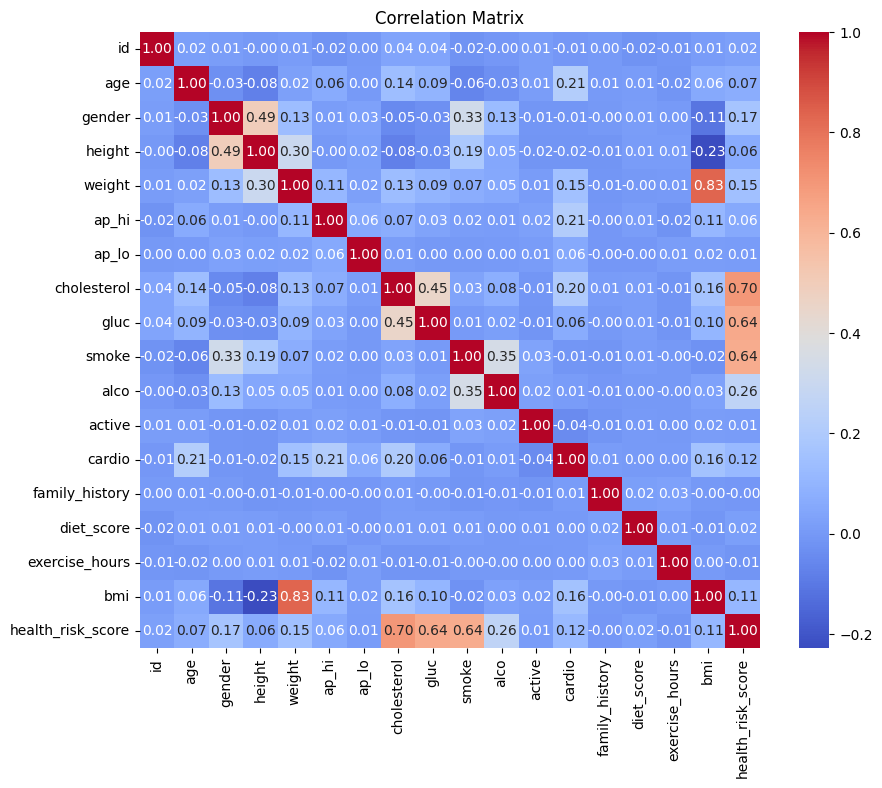

In [60]:
# Correlation Analysis
# Need to exclude non-numeric columns for correlation calculation
numeric_data = patient_with_regions.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix for the numerical features
correlation_matrix = numeric_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Risk Factor Analysis

In this step, we analyze the relationship between various risk factors and cardiovascular disease (CVD). We focus on how certain factors, such as cholesterol levels, smoking, and activity status, correlate with the presence of cardiovascular disease (`cardio` column).

- **Step 1**: First convert categorical columns to numeric using LabelEncoder to facilitate statistical analysis and visualization. For instance, cholesterol levels and activity status are encoded numerically:
  - Cholesterol levels are transformed into numeric values.
  - Activity status is encoded into `Active=1` and `Inactive=0`.

- **Step 2**: Then visualize the distribution of these risk factors grouped by the `cardio` target variable, which indicates the presence or absence of cardiovascular disease. The visualizations help identify trends and differences between individuals with and without CVD.

The first visualization shows the cholesterol levels, comparing their distribution between patients with and without cardiovascular disease.


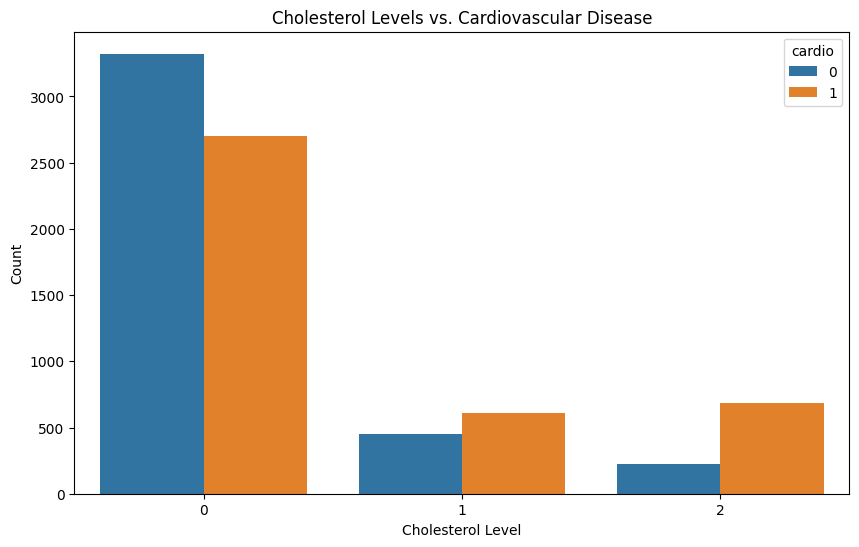

In [61]:
# Risk Factor Analysis
# Focus on analyzing the relationship between 'cardio' and several risk factors
# Converting categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Example: Convert cholesterol levels to numeric (if categorical)
patient_with_regions['cholesterol'] = label_encoder.fit_transform(patient_with_regions['cholesterol'])

# Example: Convert activity_status to numeric (Active=1, Inactive=0)
patient_with_regions['activity_status'] = label_encoder.fit_transform(patient_with_regions['activity_status'])

# Visualizing distributions for 'cholesterol', 'smoke', 'age', etc., grouped by the 'cardio' target variable

# Cholesterol levels
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_with_regions, x='cholesterol', hue='cardio')
plt.title('Cholesterol Levels vs. Cardiovascular Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

### Smoking Status and Cardiovascular Disease

In this analysis, we explore the relationship between smoking status and cardiovascular disease (CVD). Smoking is a well-known risk factor for heart disease, and we investigate how smoking habits correlate with the presence of cardiovascular disease in the dataset.

- **Step 1**: We use the `smoke` column to visualize the distribution of smoking status among patients. This column contains binary values (0 for non-smokers, 1 for smokers).

- **Step 2**: A `countplot` is used to display the number of smokers and non-smokers within the two groups: those with and without cardiovascular disease (`cardio` column). The hue parameter helps differentiate between the two groups.

The following visualization shows the relationship between smoking status and the prevalence of cardiovascular disease:

```python
# Smoking status
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_with_regions, x='smoke', hue='cardio')
plt.title('Smoking vs. Cardiovascular Disease')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


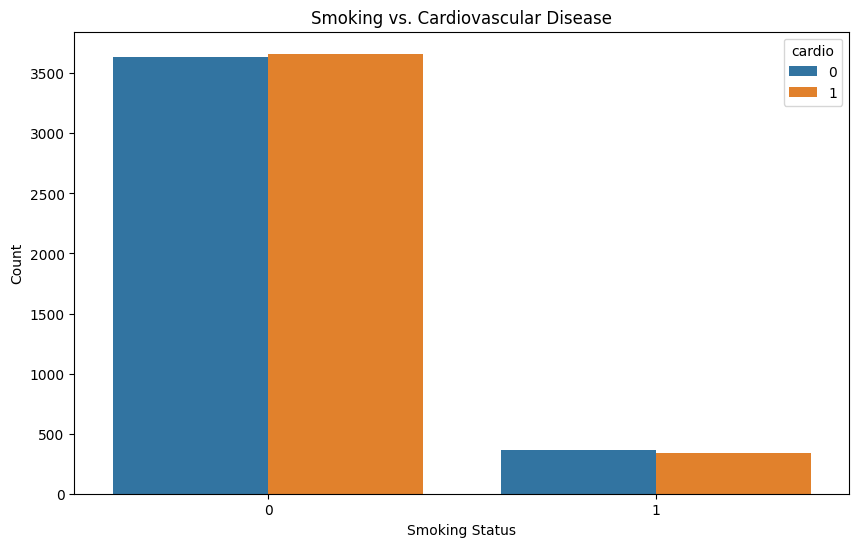

In [62]:
# Smoking status
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_with_regions, x='smoke', hue='cardio')
plt.title('Smoking vs. Cardiovascular Disease')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

### Age Group and Cardiovascular Disease

In this analysis, we explore the relationship between age groups and the presence of cardiovascular disease (CVD). Age is a significant risk factor for heart disease, and we examine how different age groups are affected by CVD.

- **Step 1**: The `age_group` column is used to classify patients into age brackets: '18-30', '31-50', '51-70', and '70+'. These groups provide a sense of how cardiovascular disease is distributed across different age ranges.

- **Step 2**: A `countplot` is used to visualize the count of patients within each age group, split by whether or not they have cardiovascular disease (`cardio` column). The hue parameter helps distinguish between patients with and without CVD.

The following visualization shows the relationship between age groups and the prevalence of cardiovascular disease:


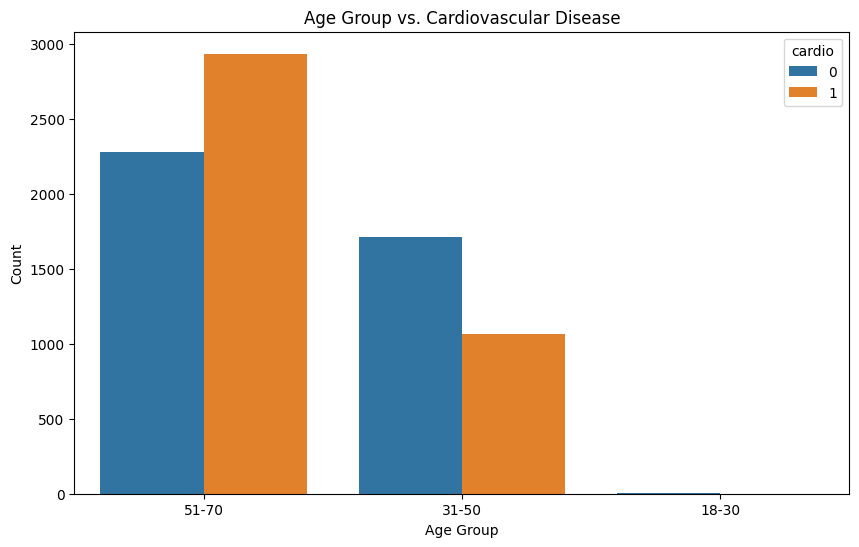

In [63]:

# Age group
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_with_regions, x='age_group', hue='cardio')
plt.title('Age Group vs. Cardiovascular Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Activity Status and Cardiovascular Disease

In this analysis, we examine the relationship between activity status (whether a person is active or inactive) and the presence of cardiovascular disease (CVD). Regular physical activity is known to be a key factor in reducing the risk of heart disease, and we analyze how this correlates with CVD outcomes.

- **Step 1**: The `activity_status` column is used to classify patients as either 'Active' or 'Inactive'. This classification is derived from the original `active` column, where 1 represents 'Active' and 0 represents 'Inactive'.

- **Step 2**: A `countplot` is used to visualize the count of patients within each activity status category, split by whether or not they have cardiovascular disease (`cardio` column). The hue parameter helps distinguish between patients with and without CVD.

The following visualization shows the relationship between activity status and the prevalence of cardiovascular disease:


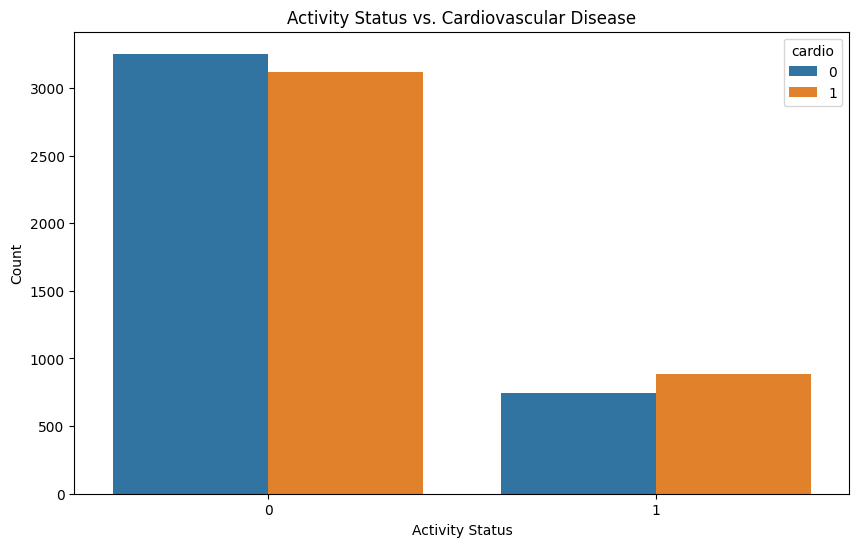

In [64]:
# Activity status
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_with_regions, x='activity_status', hue='cardio')
plt.title('Activity Status vs. Cardiovascular Disease')
plt.xlabel('Activity Status')
plt.ylabel('Count')
plt.show()

### Distribution of BMI by Age Group

This analysis visualizes the distribution of Body Mass Index (BMI) across different age groups. BMI is a key indicator of an individual's body fat and can be a critical factor in assessing the risk of cardiovascular diseases. By exploring the distribution of BMI in different age groups, we can identify patterns and potential risk factors that vary with age.

- **Step 1**: A `boxplot` is used to display the distribution of BMI for each age group. The boxplot provides insights into the median, interquartile range, and potential outliers for BMI across different age categories.
  
- **Step 2**: The age groups are shown on the x-axis, and BMI values are plotted on the y-axis, with a distinct color palette for better visual distinction.

The following visualization shows the distribution of BMI across various age groups:


<ipython-input-65-7b821d4e5709>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=patient_with_regions, x='age_group', y='bmi', palette="Set2")


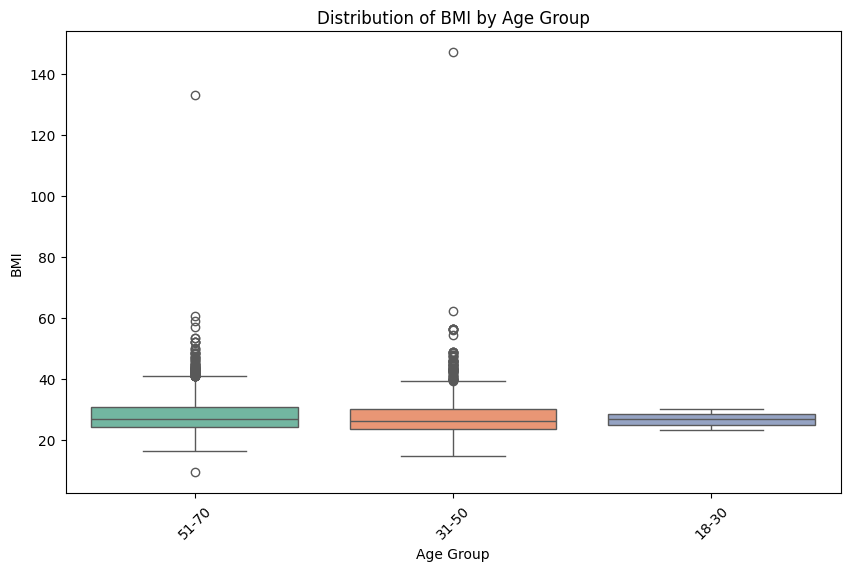

In [65]:
#Distribution of BMI by Age Group
# Plot the distribution of BMI by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=patient_with_regions, x='age_group', y='bmi', palette="Set2")
plt.title('Distribution of BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()


### Blood Pressure Categories by Region

This analysis explores the distribution of blood pressure categories across different regions. Blood pressure is a critical factor in cardiovascular health, and its categorization (Normal, Elevated, High, Hypertensive Crisis) can provide insights into regional health patterns.

- **Step 1**: The `countplot` is used to visualize the number of individuals within each blood pressure category, grouped by region. This allows us to compare the prevalence of different blood pressure levels across the regions.
  
- **Step 2**: The regions are shown on the x-axis, while the count of individuals in each blood pressure category is visualized using hues for each blood pressure category.

The following visualization shows the distribution of blood pressure categories by region:


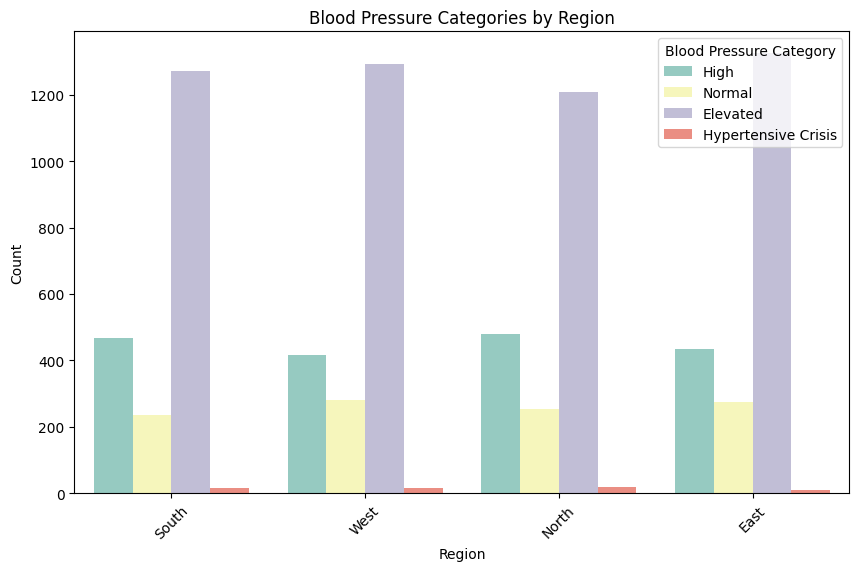

In [66]:
#Blood Pressure Categories by Region
# Plot the blood pressure categories by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=patient_with_regions, x='region', hue='blood_pressure_category', palette="Set3")
plt.title('Blood Pressure Categories by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Blood Pressure Category')
plt.xticks(rotation=45)
plt.show()


### Health Risk Score by Activity Status

This analysis explores the relationship between an individual's activity status (Active vs. Inactive) and their health risk score. The health risk score is based on factors such as cholesterol levels, glucose levels, and smoking status, and it provides a measure of cardiovascular disease risk. By examining this relationship, we can gain insights into how physical activity correlates with overall health risk.

- **Step 1**: A `boxplot` is used to visualize the health risk score distribution for individuals categorized by activity status. The boxplot allows us to compare the spread of health risk scores between those who are active and inactive.
  
- **Step 2**: The activity status is displayed on the x-axis, and the health risk score is plotted on the y-axis, with different color palettes for visual distinction.

The following visualization shows the health risk score distribution across different activity statuses:


<ipython-input-67-0b9d9a0eb998>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=patient_with_regions, x='activity_status', y='health_risk_score', palette="Set1")


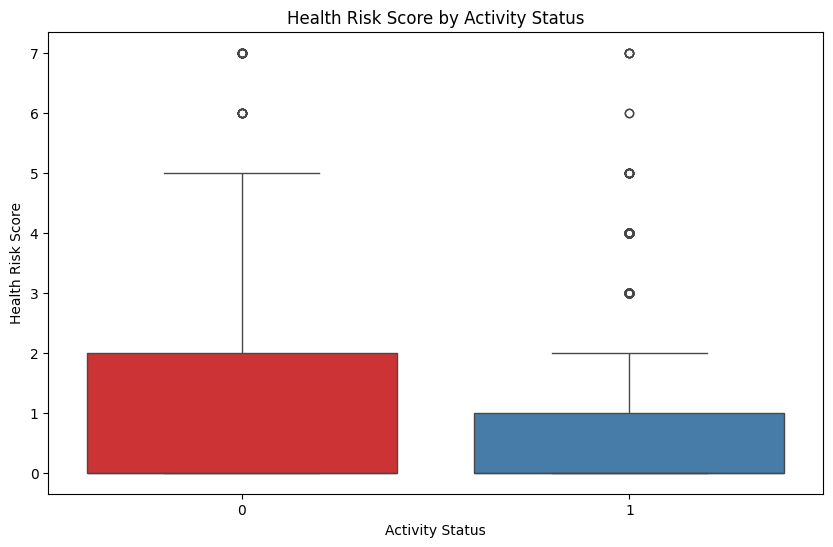

In [67]:
#Health Risk Score by Activity Status
# Plot the health risk score by Activity Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=patient_with_regions, x='activity_status', y='health_risk_score', palette="Set1")
plt.title('Health Risk Score by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Health Risk Score')
plt.show()


### Health Risk Score vs Cardiovascular Disease

This analysis examines the distribution of health risk scores between individuals with and without cardiovascular disease. The health risk score, which is based on factors such as cholesterol levels, smoking, and glucose levels, is plotted against the presence or absence of cardiovascular disease. This comparison allows us to visualize how health risk scores differ between those affected by cardiovascular disease and those who are not.

- **Step 1**: A `boxplot` is used to visualize the distribution of health risk scores, with the x-axis representing the presence or absence of cardiovascular disease, and the y-axis representing the health risk score.
  
- **Step 2**: The categorical variable `cardio` is displayed on the x-axis, with values indicating whether the individual has cardiovascular disease (`1` for 'Yes', `0` for 'No'). The health risk score is plotted on the y-axis.

The following visualization shows the relationship between cardiovascular disease and health risk scores:


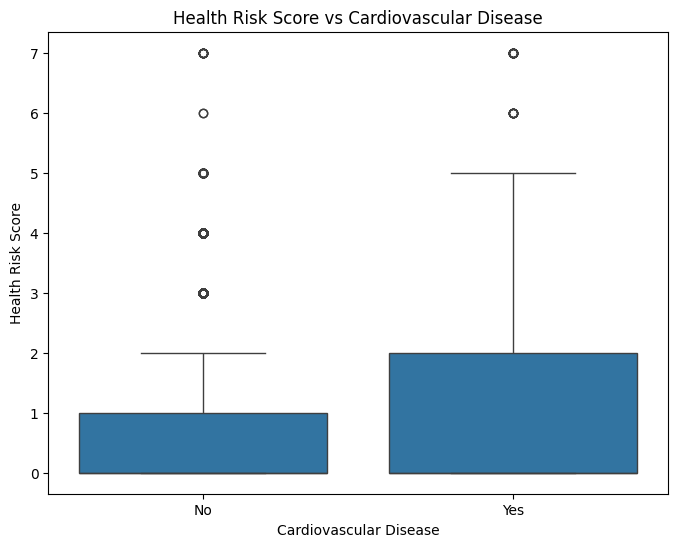

In [68]:
# Visualize the health risk score distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=patient_with_regions, x='cardio', y='health_risk_score')
plt.title('Health Risk Score vs Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Health Risk Score')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


# Conclusion

In this cardiovascular disease analysis, we explored a dataset containing various health parameters to better understand the risk factors associated with cardiovascular disease (CVD). The primary focus was to analyze key health metrics, such as cholesterol levels, smoking habits, blood pressure, BMI, and activity status, and how they relate to the likelihood of having CVD.

### Key Findings:
1. **Cholesterol Levels**: Higher cholesterol levels are closely associated with a higher likelihood of cardiovascular disease. Elevated cholesterol levels were observed to correlate with increased risk.
2. **Smoking**: Smoking emerged as a significant risk factor, with smokers being more likely to have cardiovascular disease compared to non-smokers.
3. **Age Group**: As expected, older age groups showed a higher incidence of cardiovascular disease, emphasizing the importance of age as a risk factor.
4. **Activity Status**: Inactive individuals were more likely to suffer from cardiovascular disease, highlighting the importance of maintaining an active lifestyle for heart health.
5. **Health Risk Score**: The health risk score, which was calculated based on cholesterol, blood glucose levels, and smoking, further reinforced the findings that individuals with higher scores were at increased risk of cardiovascular disease.

### Visual Insights:
The various visualizations helped uncover important trends in the data, such as the distribution of BMI across different age groups, blood pressure categories by region, and the relationship between activity levels and health risk scores.

### Conclusion:
Overall, this analysis reinforced the importance of several key lifestyle factors—such as activity level, smoking, and diet (indicated by cholesterol and blood glucose levels)—in determining the likelihood of cardiovascular disease. These findings could potentially be used to inform public health strategies aimed at reducing the incidence of cardiovascular disease through targeted interventions focused on modifiable risk factors like smoking cessation, increased physical activity, and managing cholesterol levels.

By understanding these relationships, healthcare professionals and policymakers can better design prevention programs and provide more personalized care to individuals at risk.
